In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
import random
import hashlib
import json
import time


In [2]:
# Simulate sample data if no dataset yet
data = pd.DataFrame({
    'vibration': np.random.uniform(0.1, 5.0, 1000),
    'temperature': np.random.uniform(30, 100, 1000),
    'pressure': np.random.uniform(1, 10, 1000),
    'failure': np.random.choice([0, 1], 1000)  # 0: Normal, 1: Failure
})

# Save for later reuse (optional)
data.to_csv('equipment_failure_data.csv', index=False)

# Load data
data = pd.read_csv('equipment_failure_data.csv')
data.head()


,vibration,temperature,pressure,failure
0,3.707163,59.581385,4.744262,0
1,4.740167,70.822457,3.846748,1
2,0.798962,64.166810,6.115061,0
3,4.092538,36.908242,9.014851,0
4,0.677129,60.431435,9.433343,0


In [3]:
# Features & labels
X = data[['vibration', 'temperature', 'pressure']]
y = data['failure']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
preds = model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print(f"Model accuracy: {accuracy:.2%}")

# Save model
joblib.dump(model, 'failure_predictor.pkl')


Model accuracy: 44.50%


['failure_predictor.pkl']

In [5]:
# Simulate and test a single data point
def generate_sensor_data():
    return {
        'vibration': round(random.uniform(0.1, 5.0), 2),
        'temperature': round(random.uniform(30, 100), 2),
        'pressure': round(random.uniform(1, 10), 2)
    }

# Simulate 5 readings & check prediction
for _ in range(5):
    sensor_data = generate_sensor_data()
    print(f"Sensor data: {sensor_data}")  # <-- fixed: removed extra quote
    features = np.array([[sensor_data['vibration'], sensor_data['temperature'], sensor_data['pressure']]])
    prediction = model.predict(features)[0]
    if prediction == 1:
        print("⚠️  Alert: Failure predicted!\n")
    else:
        print("✅  All normal.\n")


Sensor data: {'vibration': 4.69, 'temperature': 44.74, 'pressure': 8.42}
⚠️  Alert: Failure predicted!

Sensor data: {'vibration': 2.54, 'temperature': 48.29, 'pressure': 9.57}
⚠️  Alert: Failure predicted!

Sensor data: {'vibration': 3.09, 'temperature': 53.06, 'pressure': 2.41}
⚠️  Alert: Failure predicted!

Sensor data: {'vibration': 2.94, 'temperature': 57.72, 'pressure': 6.09}
⚠️  Alert: Failure predicted!

Sensor data: {'vibration': 0.25, 'temperature': 58.9, 'pressure': 1.86}
✅  All normal.



c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\skl

In [6]:
# Simple blockchain class
class Blockchain:
    def __init__(self):
        self.chain = []
        self.current_data = []
        self.new_block(previous_hash='1', proof=100)

    def new_block(self, proof, previous_hash=None):
        block = {
            'index': len(self.chain) + 1,
            'timestamp': time.time(),
            'data': self.current_data,
            'proof': proof,
            'previous_hash': previous_hash or self.hash(self.chain[-1]),
        }
        self.current_data = []
        self.chain.append(block)
        return block

    def new_data(self, equipment_id, action):
        self.current_data.append({
            'equipment_id': equipment_id,
            'action': action,
            'timestamp': time.time(),
        })

    @staticmethod
    def hash(block):
        block_string = json.dumps(block, sort_keys=True).encode()
        return hashlib.sha256(block_string).hexdigest()

    def last_block(self):
        return self.chain[-1]


In [7]:
# Initialize blockchain
bc = Blockchain()

# Add a maintenance record
bc.new_data(equipment_id="CNC001", action="Bearing replaced")
bc.new_data(equipment_id="PUMP02", action="Motor realigned")

# Create a new block
new_block = bc.new_block(proof=bc.last_block()['proof'] + 1)

# Display the block
print(json.dumps(new_block, indent=2))


{
  "index": 2,
  "timestamp": 1746094622.8273618,
  "data": [
    {
      "equipment_id": "CNC001",
      "action": "Bearing replaced",
      "timestamp": 1746094622.8271945
    },
    {
      "equipment_id": "PUMP02",
      "action": "Motor realigned",
      "timestamp": 1746094622.8272693
    }
  ],
  "proof": 101,
  "previous_hash": "cefa219239cb453b3627d2f1124c309a4befb457892b428988aacf280569e3be"
}


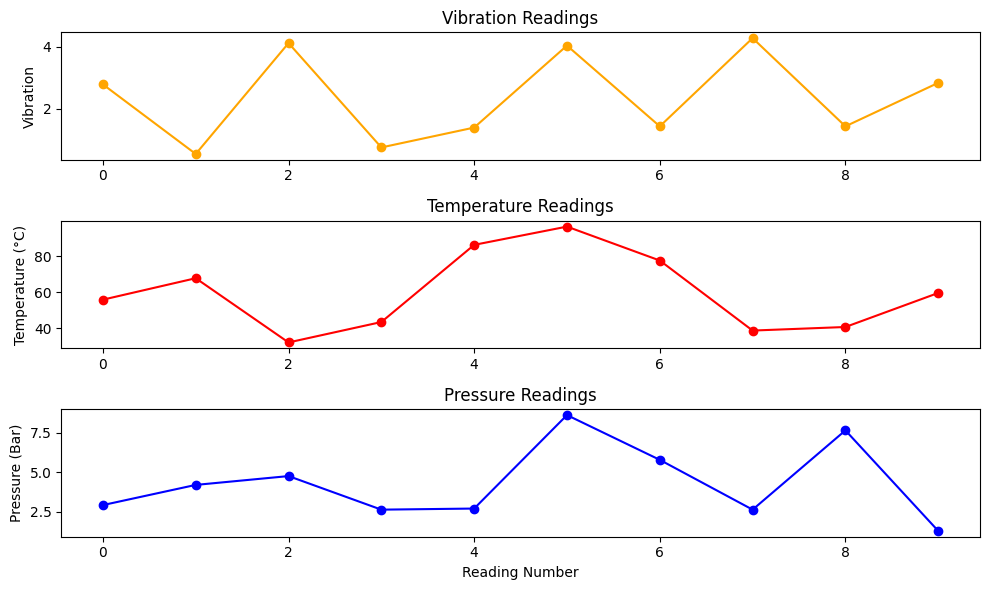

In [10]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Initialize storage for readings
vibration_list = []
temperature_list = []
pressure_list = []
prediction_list = []

def generate_sensor_data():
    return {
        'vibration': round(random.uniform(0.1, 5.0), 2),
        'temperature': round(random.uniform(30, 100), 2),
        'pressure': round(random.uniform(1, 10), 2)
    }

# Simulate 10 readings & check predictions with live graph
for i in range(10):
    sensor_data = generate_sensor_data()
    features_df = pd.DataFrame([sensor_data])
    prediction = model.predict(features_df)[0]

    # Store data for plotting
    vibration_list.append(sensor_data['vibration'])
    temperature_list.append(sensor_data['temperature'])
    pressure_list.append(sensor_data['pressure'])
    prediction_list.append(prediction)

    # Print status
    print(f"Reading {i+1}: {sensor_data}")
    if prediction == 1:
        print("⚠️  Failure predicted! Logging maintenance action.")
    else:
        print("✅  Normal operation.")
    print("----------------------------------------")

    # Plot live graph
    clear_output(wait=True)
    plt.figure(figsize=(10, 6))

    plt.subplot(3, 1, 1)
    plt.plot(vibration_list, marker='o', color='orange')
    plt.title('Vibration Readings')
    plt.ylabel('Vibration')

    plt.subplot(3, 1, 2)
    plt.plot(temperature_list, marker='o', color='red')
    plt.title('Temperature Readings')
    plt.ylabel('Temperature (°C)')

    plt.subplot(3, 1, 3)
    plt.plot(pressure_list, marker='o', color='blue')
    plt.title('Pressure Readings')
    plt.ylabel('Pressure (Bar)')
    plt.xlabel('Reading Number')

    plt.tight_layout()
    plt.show()
